In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from matplotlib.colors import ListedColormap



np.set_printoptions(precision=5, suppress=True)

# Set random seed to student number
np.random.seed(46387334) # TODO: UNCOMMENT

In [3]:
# Helper functions
def sig_fig(X, sigfigs):
    exp = np.floor(ma.log10(abs(X)).filled(0))
    return np.round(X*10**-exp, sigfigs-1) * 10**exp

def get_diff(a1, a2):
    print(f"{a1.shape=}")
    print(f"{a2.shape=}")

    rows, cols = a1.shape
    for i in range(rows):
        for j in range(cols):
            print(f"[{i},{j}]: {round(a1[i, j], 3) :>5} vs {round(a2[i, j], 3) :>7}  |  Error: {(a1[i, j] - a2[i, j]) * (100 / a1[i, j])  :.2f}%")

## 2.c)

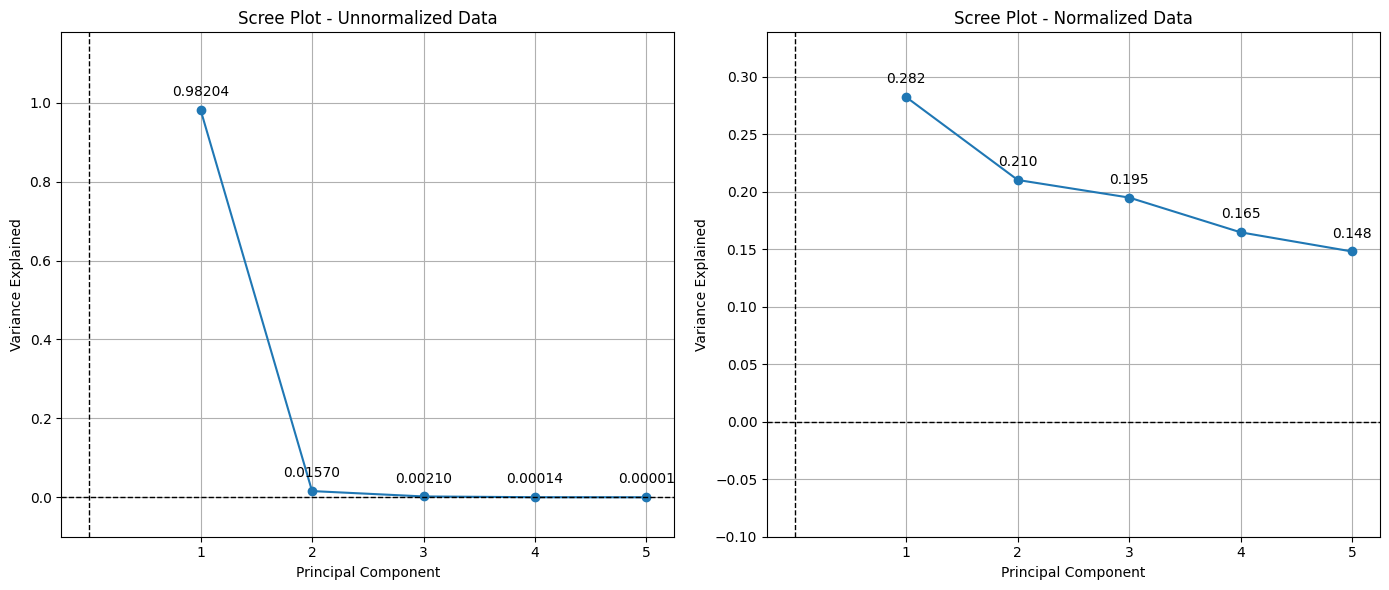

In [13]:
from ucimlrepo import fetch_ucirepo 

# Fetch dataset from https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# Extract data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 

# Transform the needed columns into the "normal" forms
X['logcp']    = np.log(X['creatinine_phosphokinase'])
X['sqrtplat'] = np.sqrt(X['platelets'])
X['recipsc']  = 1 / X['serum_creatinine']

# Redfine X to just be the 5 columns of interest
cols_to_keep = ['logcp', 'ejection_fraction', 'sqrtplat', 'recipsc', 'serum_sodium']
X_trans      = X[cols_to_keep]

# Normalize the dataset
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_trans)

# Perform PCA on the original dataset
pca_original = PCA()
pca_original.fit(X_trans)
explained_variance_original = pca_original.explained_variance_ratio_

# Perform PCA on the normalized dataset
pca_normalized = PCA()
pca_normalized.fit(X_norm)
explained_variance_normalized = pca_normalized.explained_variance_ratio_


# Create scree plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scree plot for unnormalized data
axs[0].plot(np.arange(1, len(explained_variance_original) + 1), explained_variance_original, marker='o')
axs[0].set_title('Scree Plot - Unnormalized Data')
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Variance Explained')
axs[0].set_xticks(np.arange(1, len(explained_variance_original) + 1))

# Scree plot for normalized data
axs[1].plot(np.arange(1, len(explained_variance_normalized) + 1), explained_variance_normalized, marker='o')
axs[1].set_title('Scree Plot - Normalized Data')
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Variance Explained')
axs[1].set_xticks(np.arange(1, len(explained_variance_normalized) + 1))

axs[1].grid()
axs[0].grid()




# Add labels for each point in the unnormalized scree plot
for i, var in enumerate(explained_variance_original):
    axs[0].annotate(f'{var:.5f}', (i + 1, var), textcoords="offset points", xytext=(0, 10), ha='center')


# Add labels for each point in the normalized scree plot
for i, var in enumerate(explained_variance_normalized):
    axs[1].annotate(f'{var:.3f}', (i + 1, var), textcoords="offset points", xytext=(0, 10), ha='center')


# Increase y-axis bounds for the normalized data plot
axs[1].set_ylim(-0.1, max(explained_variance_normalized) * 1.2)
axs[0].set_ylim(-0.1, max(explained_variance_original) * 1.2)

axs[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axs[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axs[1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axs[0].axvline(x=0, color='black', linestyle='--', linewidth=1)


plt.tight_layout()
plt.show()